In [1]:
#imports
import numpy as np
import pandas as pd
from numpy.fft import * #fourier
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\saile\AppData\Local\Temp\ipykernel_8588\2225800657.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Read in data
df = pd.read_csv('EMG-data.csv', header=0)
print(df.head())
sns.set(style="whitegrid")

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  


(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)
(4237907,)


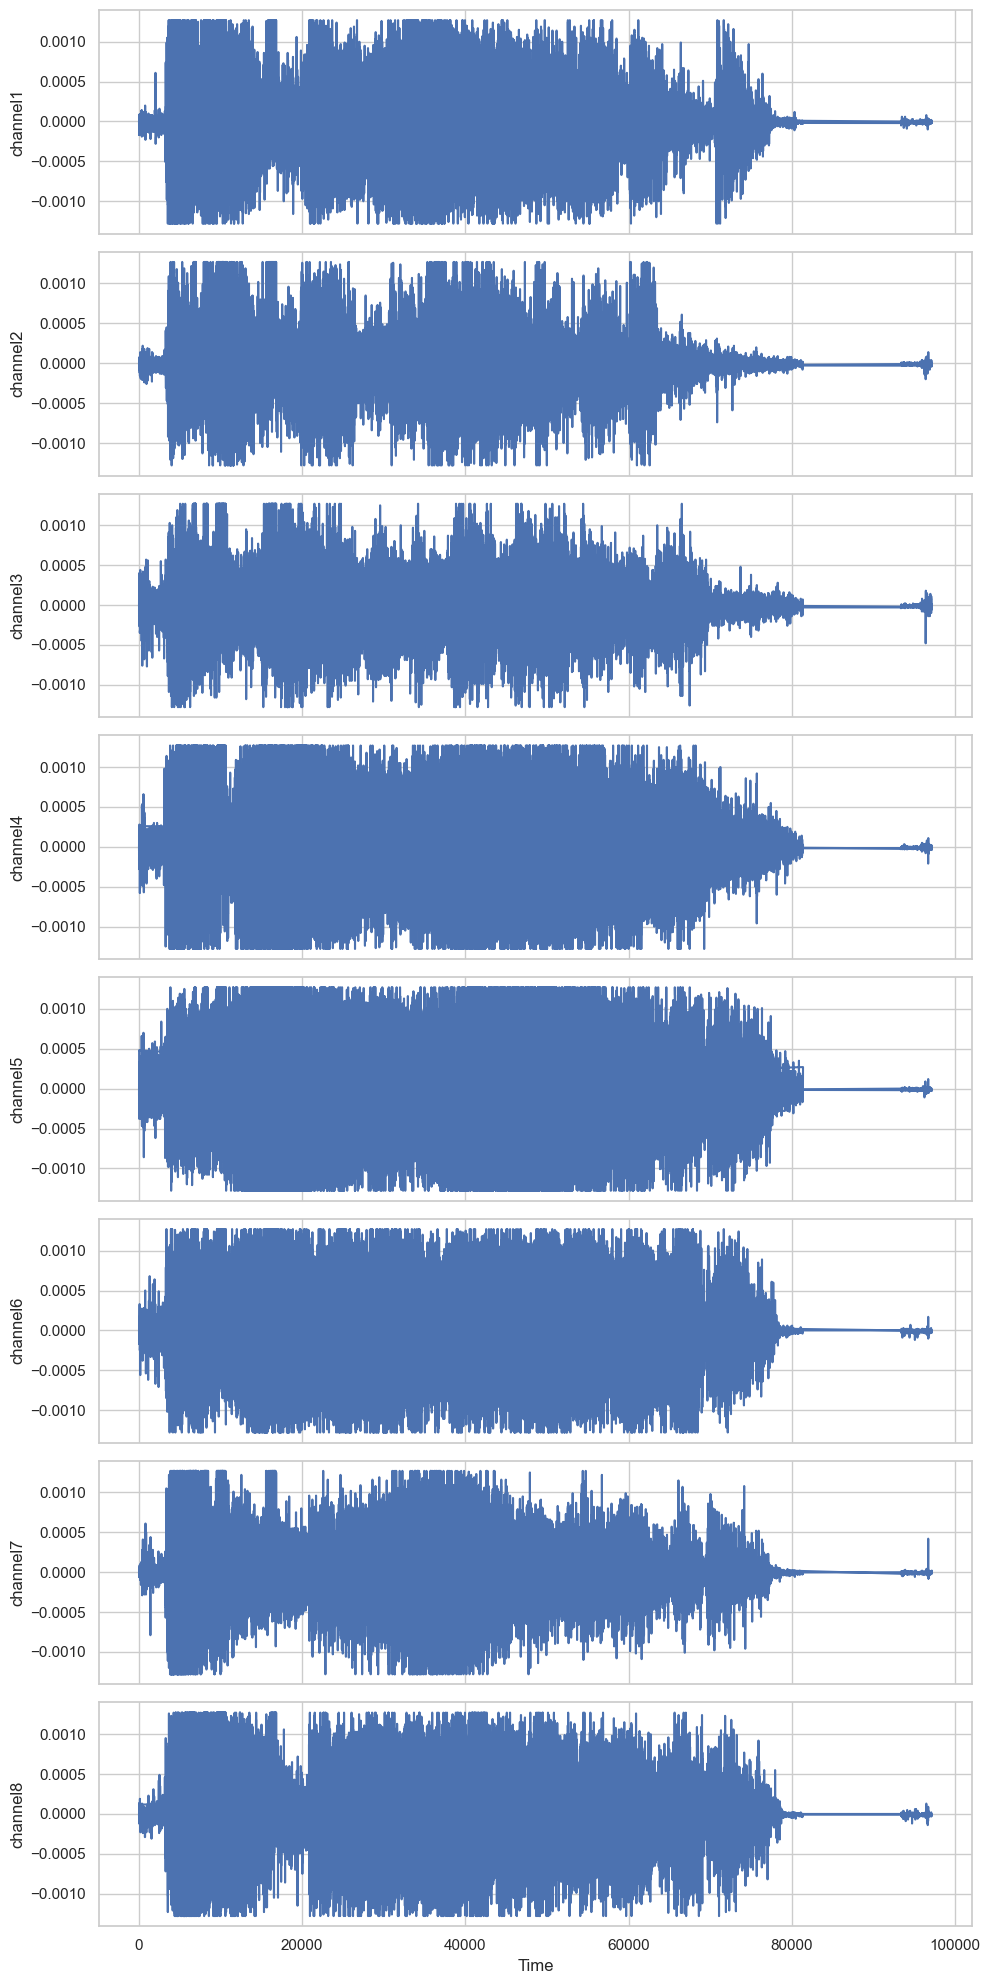

In [3]:
#dividing time and emg channel data
time = df['time']
emg_channels = df.iloc[:, 1:9]


#making the emg data graph
fig, axs = plt.subplots(8, 1, figsize=(10, 20), sharex=True)

#plotting each emg channel individually
for i, col in enumerate(emg_channels.columns):
    print (emg_channels[col].shape)
    print (time.shape)
    axs[i].plot(time, emg_channels[col])
    axs[i].set_ylabel(col)

plt.xlabel('Time')

plt.tight_layout()

plt.show()


In [4]:
#Fourier transfrom function
def filter_signal(signal, threshold=1e8):
    filtered_signals = []
    for col in signal.columns:
        col_signal = signal[col].values
        filtered_col_signal = filter_signal_single_channel(col_signal, threshold)
        print (filtered_col_signal.shape)
        filtered_signals.append(filtered_col_signal)

    #return pd.DataFrame(filtered_signals, columns=signal.columns)
    return filtered_signals

#fourier transform for individual channe;s
def filter_signal_single_channel(signal, threshold=1e8):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    result=irfft(fourier)
    return result

(4237907, 8)
[-2.47197343e-05 -2.41563910e-05 -2.35950141e-05 ... -2.64192939e-05
 -2.58514164e-05 -2.52848191e-05]


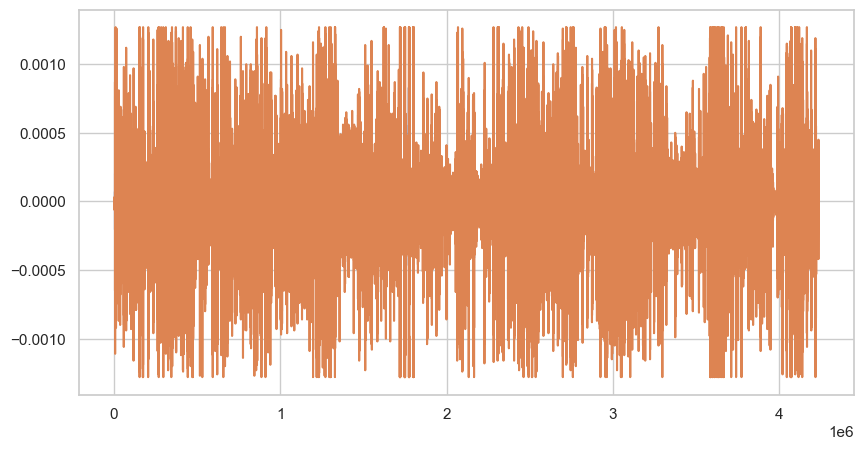

In [5]:
#emg_channels=emg_channels.T
print(np.array(emg_channels).shape)
filtered_emg_channels=filter_signal_single_channel(np.array(emg_channels)[:,0],1e6) 
#filtered_emg_channels= pd.DataFrame(filter_signal(np.array(emg_channels)))
#type(emg_channels)
#np.array(emg_channels).shape


#resize plt shape
plt.figure(figsize=(10, 5))
print(np.array(filtered_emg_channels))
plt.plot(filtered_emg_channels)
plt.plot(np.array(emg_channels)[:,0])
plt.show()

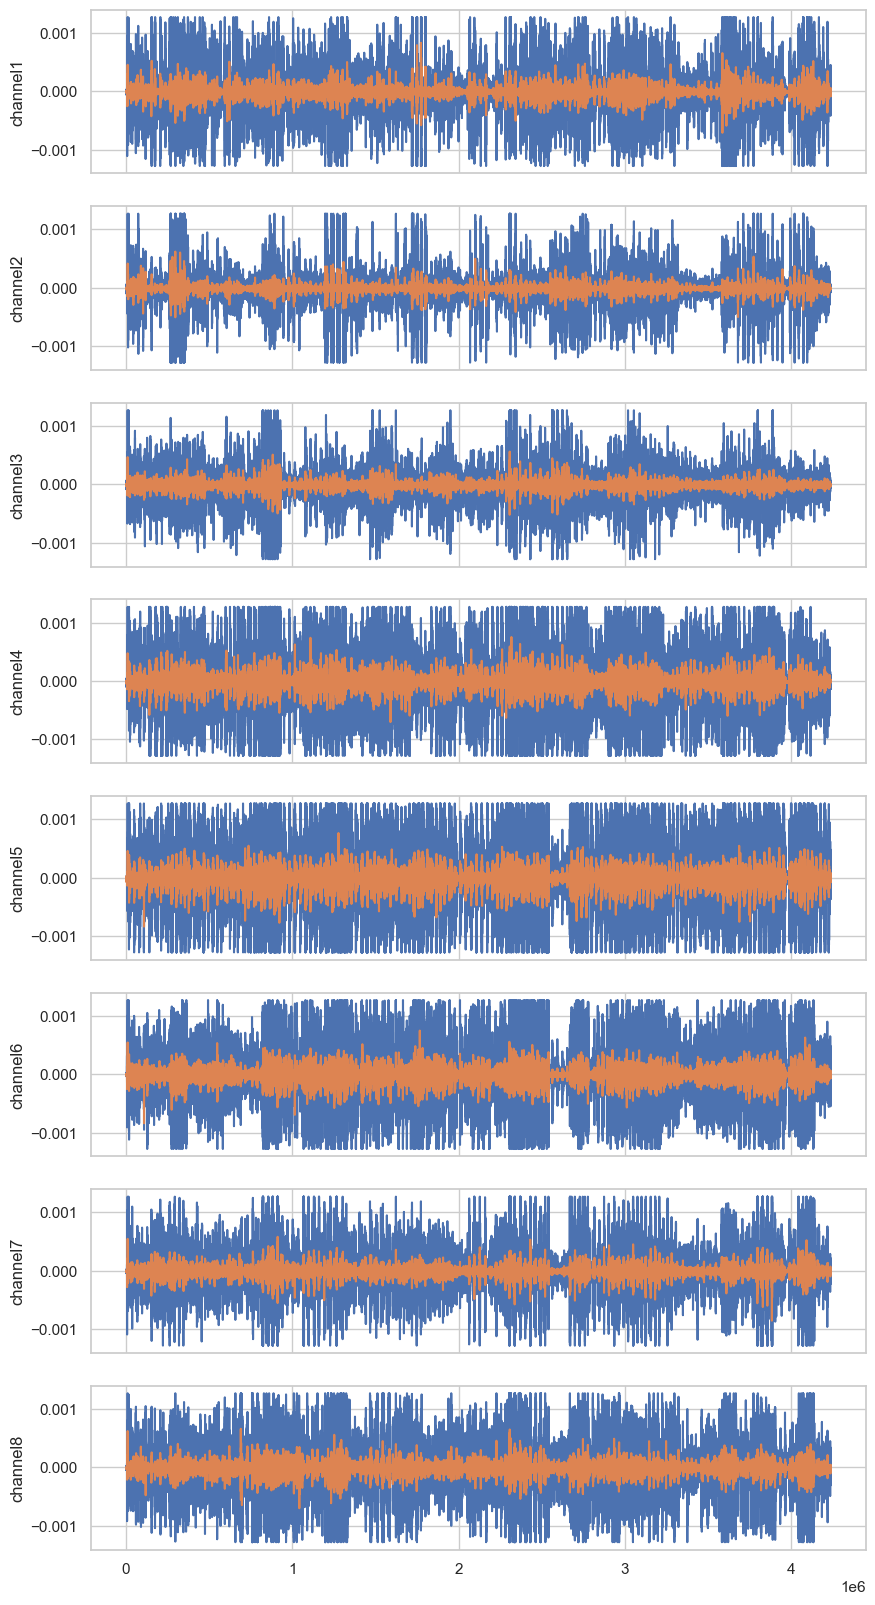

In [6]:
#plot all data
fig, axs = plt.subplots(8, 1, figsize=(10, 20), sharex=True)

for i in range(8):
    axs[i].plot(np.array(emg_channels)[:,i])
    axs[i].plot(filter_signal_single_channel(np.array(emg_channels)[:,i],1e6))
    axs[i].set_ylabel(emg_channels.columns[i])
    


In [8]:
def individual_model_runner(emg_data,joint_angle,model):
    model_trained = model.fit(emg_data,joint_angle)
    return model_trained

def predict(a,b):
    return a+b

def sub(a,b):
    return a-b  

print(foo(1,2,add))
print(foo(1,2,sub))

3
-1
